**Использование K-means для сжатия**

Еще одно полезное применение кластеризации — сжатие изображений. Схема до удивления проста: похожие, рядом расположенные цвета, стоит объединить в один цвет. Давайте провернем это самостоятельно.

In [1]:
!wget https://de.ifmo.ru/--openedu/dataprocessing/appliedai/img/28.jpg

--2025-01-07 11:44:18--  https://de.ifmo.ru/--openedu/dataprocessing/appliedai/img/28.jpg
Resolving de.ifmo.ru (de.ifmo.ru)... 77.234.213.242
Connecting to de.ifmo.ru (de.ifmo.ru)|77.234.213.242|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 269068 (263K) [image/jpeg]
Saving to: ‘28.jpg’

28.jpg              100%[===================>] 262.76K   390KB/s    in 0.7s    

2025-01-07 11:44:20 (390 KB/s) - ‘28.jpg’ saved [269068/269068]



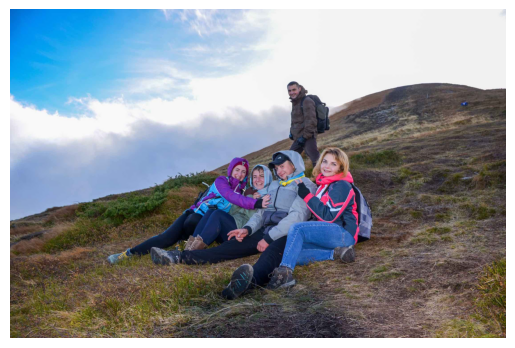

In [2]:
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt

random_state = 12

# Путь к изображению
img_path = '/content/28.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)
plt.show()  # Добавьте эту строку, чтобы отобразить изображение - в колаюе можно без нее

Введите .shape изображения

In [3]:
print(img.shape)

(1472, 2222, 3)


Перед нами трехканальное (RGB) изображение. Вычислите среднее значение интенсивности пикселей по всем каналам.

In [4]:
print(img.mean())

132.99855885724443


Нормируем значения интенсивностей пикселей, разделив все значения на  255 . Вычислите среднее значение интенсивности пикселей по всем каналам после проделанного преобразования.

In [5]:
h,w,c = img.shape
data = img / 255
print(data.mean())
data = data.reshape(h*w, c)


0.5215629759107632


**Найдем Количество уникальных цветов в изображении**

In [6]:
import numpy as np

# Преобразуем изображение в массив пикселей
pixels = img.reshape(-1, 3)

# Находим уникальные цвета
unique_colors = np.unique(pixels, axis=0)

# Количество уникальных цветов
num_unique_colors = unique_colors.shape[0]
print(f"Количество уникальных цветов в изображении: {num_unique_colors}")

Количество уникальных цветов в изображении: 271738


Давайте убедимся в том, что исходное пространство цветов, насчитывающее около  16  миллионов возможных состояний ( 256**3 ), слишком велико, и его размерность можно понижать. Для наглядности построим лишь некоторые подвыборки зависимостей значений интенсивностей и лишь на случайном поднаборе пикселей.

«Распрямите» изображение так, чтобы .shape соответствущего массива имел вид (высота * ширина, 3)

**Графики с изображением (размытые, "песочные")**

Когда вы передаёте в функцию plot_pixels данные из изображения, происходит следующее:

Данные изображения:

Изображение состоит из пикселей, каждый из которых имеет значения Red, Green и Blue (RGB).

Эти значения обычно не равномерно распределены, а соответствуют реальным цветам изображения (например, небо будет иметь много синих оттенков, трава — зелёных и т.д.).

В результате, на графике точки группируются в определённых областях, соответствующих доминирующим цветам изображения.

Почему графики выглядят "размытыми":

В реальных изображениях цвета часто плавно переходят друг в друга (например, градиенты или тени).

Это приводит к тому, что точки на графике располагаются близко друг к другу, создавая эффект "размытости" или "песочности".

Кроме того, если изображение содержит много похожих цветов, точки будут накладываться друг на друга, создавая плотные скопления.

Пример:
Если у вас есть изображение с небом, травой и другими объектами, то:

На графике Red vs Green будут плотные скопления точек в областях, соответствующих цветам травы (высокий Green) и неба (низкий Green).

На графике Red vs Blue будут плотные скопления точек в областях, соответствующих цветам неба (высокий Blue) и травы (низкий Blue).

In [7]:
# Функция принимает на вход "распрямленный" массив, соответствующий изображению
import numpy as np  # Добавьте этот импорт
import matplotlib.pyplot as plt  # Убедитесь, что matplotlib также импортирован

def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

In [8]:
plt.show()  # Добавьте эту строку, чтобы отобразить графики

# Пример вызова функции
# data = np.random.rand(10000, 3)  # Пример данных для тестирования
# plot_pixels(data)

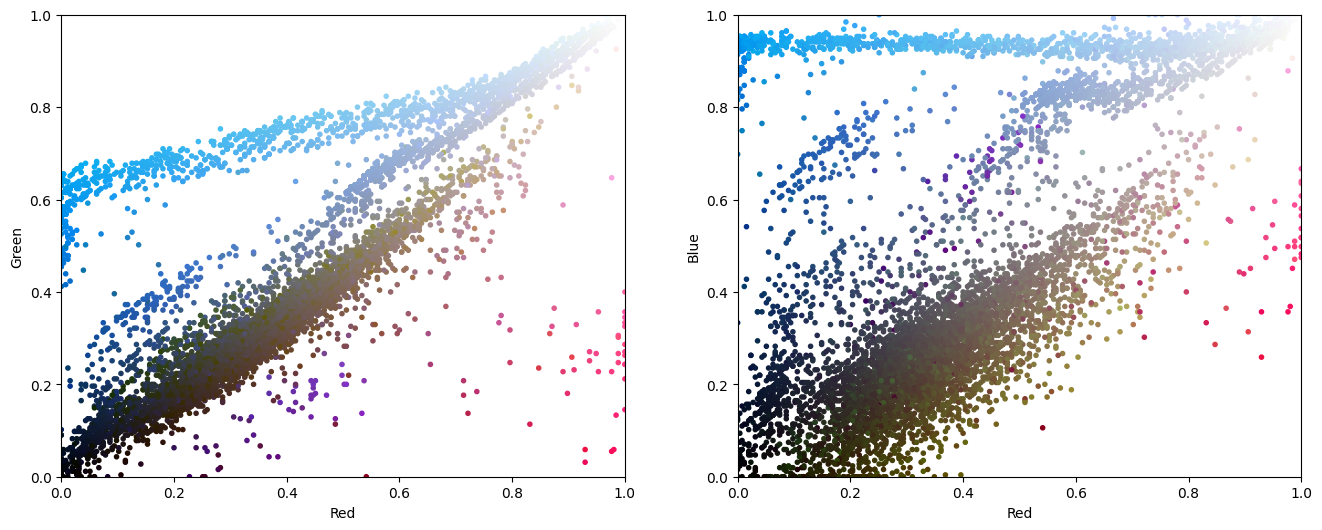

In [9]:
plot_pixels(data)

Как работает функция?
Входные данные:

data: Это "распрямлённый" массив, где каждая строка соответствует одному пикселю, а столбцы — это значения каналов (Red, Green, Blue).

colors: Цвета точек на графике. Если не переданы, используются цвета из data.

N: Количество случайно выбранных пикселей для отображения (по умолчанию 10 000).

Шаги функции:

Создаётся генератор случайных чисел (np.random.RandomState) для выбора случайных пикселей.

Из data выбирается N случайных пикселей.

Разделяются каналы Red, Green и Blue.

Строятся два графика:

Левый график: Red (по оси X) vs Green (по оси Y).

Правый график: Red (по оси X) vs Blue (по оси Y).

**Тестовые данные np.random.rand(10000, 3):**

Когда вы используете data = np.random.rand(10000, 3), вы создаёте случайные значения для Red, Green и Blue каналов.

Эти значения равномерно распределены в диапазоне от 0 до 1, поэтому на графике точки будут заполнять всё пространство равномерно, без явных кластеров.

**Графики с np.random.rand (полностью заполненные цветными точками)**

**Когда вы используете data = np.random.rand(10000, 3), происходит следующее:**

Данные:

np.random.rand(10000, 3) создаёт массив из 10 000 случайных точек, где каждая точка имеет три значения (Red, Green, Blue), равномерно распределённые в диапазоне от 0 до 1.

Это означает, что все возможные комбинации Red, Green и Blue равновероятны.

Почему графики выглядят полностью заполненными:

Поскольку значения Red, Green и Blue распределены равномерно, точки на графике покрывают всё пространство равномерно.

На графике Red vs Green точки будут равномерно заполнять квадрат от (0, 0) до (1, 1).

На графике Red vs Blue будет аналогичная картина.

Цвета точек:

Каждая точка на графике окрашена в цвет, соответствующий её значениям Red, Green и Blue.

Поскольку цвета также распределены равномерно, график выглядит как равномерное заполнение цветными точками.

4. Как интерпретировать графики
Для изображения:

Графики показывают, как цвета изображения распределены в пространстве Red-Green и Red-Blue.

Плотные скопления точек соответствуют доминирующим цветам изображения.

Для np.random.rand:

Графики показывают равномерное распределение всех возможных цветов в пространстве Red-Green и Red-Blue.

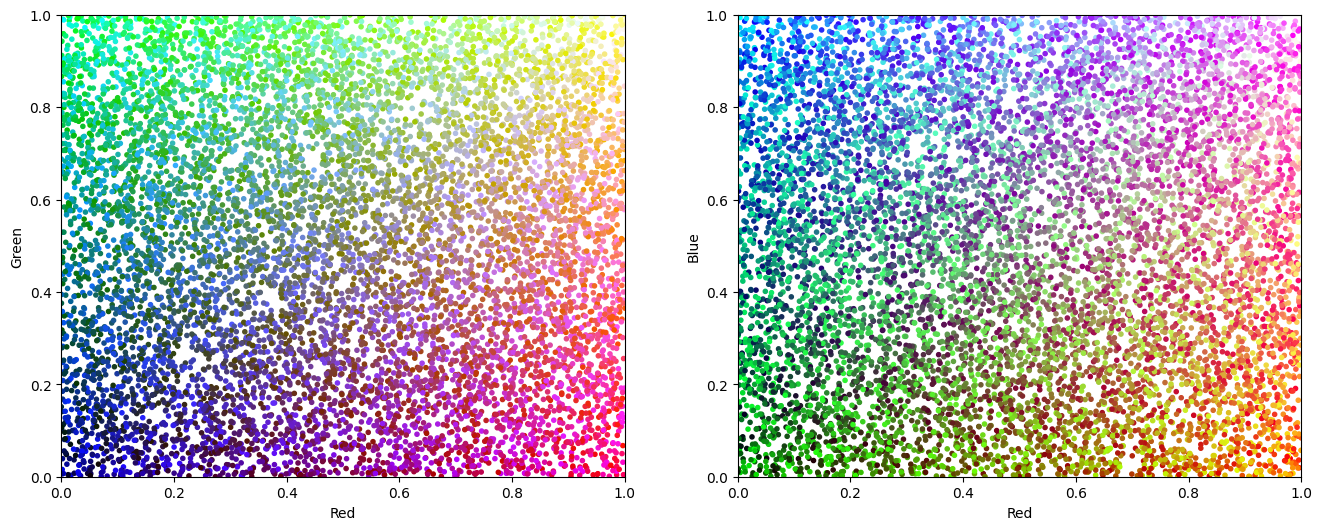

In [10]:
data_rand = np.random.rand(10000, 3)  # Пример данных для тестирования
plot_pixels(data_rand)
plt.show()

**Построим для модели K-means на 16 цветах кластерах изобраения**

Переведем 16 миллионов возможностей во всего-навсего 16 возможностей, используя K-means.  

Обучите модель K-means на нормированном и «распрямленном» изображении с параметрами, указанными в вашем задании.

В изображении замените значения цветов каждого пикселя на значения координат центроида кластера к которому был отнесен этот пиксель. Постройте графики зависимостей цветов при помощи plot_pixels() с новой палитрой (параметр colors)

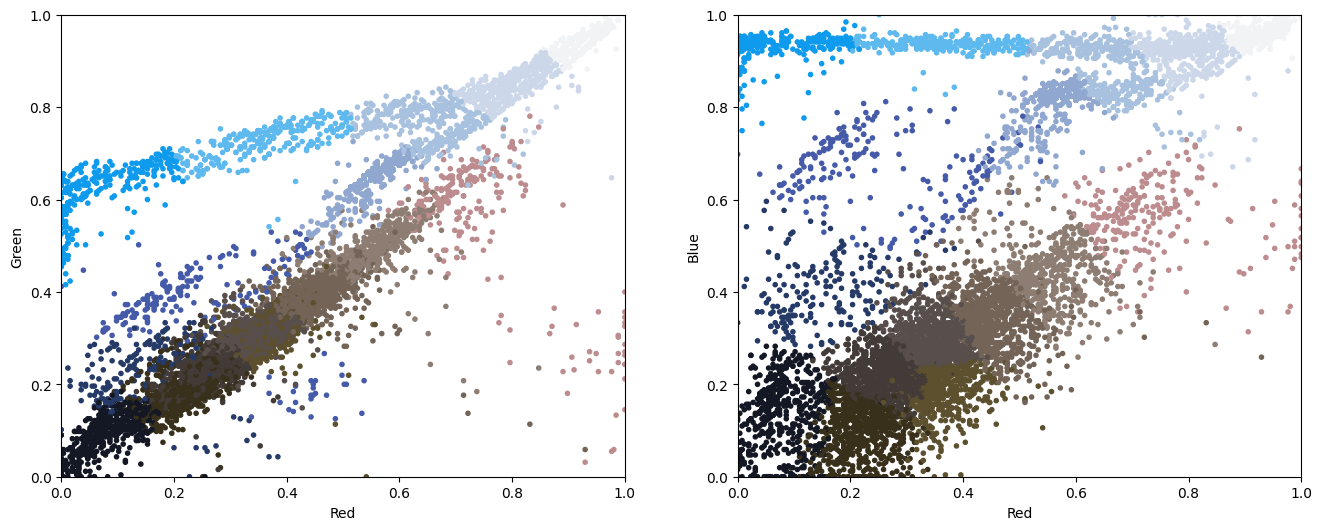

In [11]:
from sklearn.cluster import KMeans

# Уменьшение количества цветов до 16 с помощью KMeans
kmeans = KMeans(n_clusters=16)
data_reshaped = img.reshape(-1, 3)
kmeans.fit(data_reshaped)
colors = kmeans.cluster_centers_ / 255.0  # Нормализованные цвета
labels = kmeans.labels_

plot_pixels(data_reshaped / 255.0, colors=colors[labels])

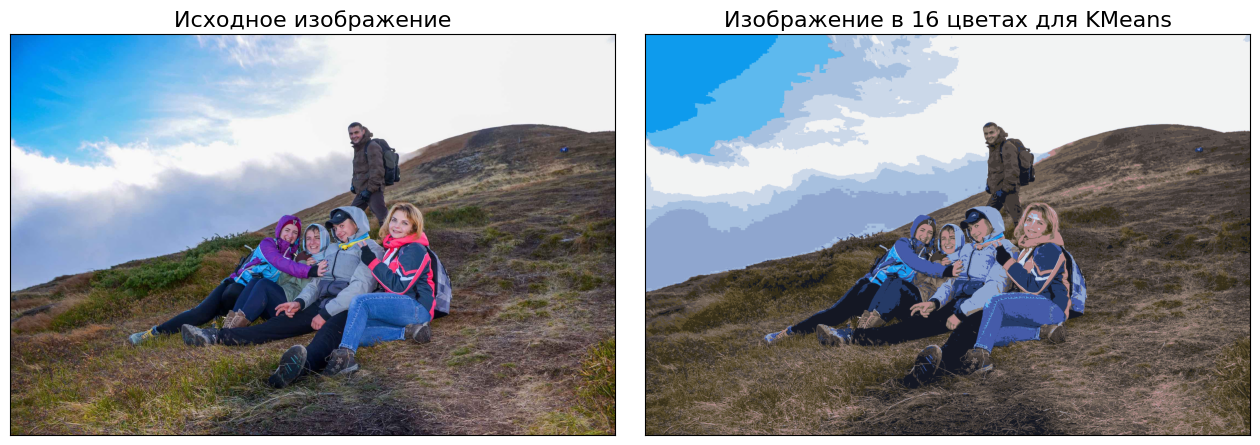

In [12]:
# Перекрашивание изображения
img_recolored = colors[labels].reshape(img.shape)  # Заменяем цвета пикселей на цвета кластеров

# Визуализация исходного и перекрашенного изображения
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Исходное изображение', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('Изображение в 16 цветах для KMeans', size=16)

plt.show()

In [13]:
print(np.mean(colors[labels]))

0.5215683872074135


**Построим изображение размера  4×4  на основе полученных  16  цветов.**

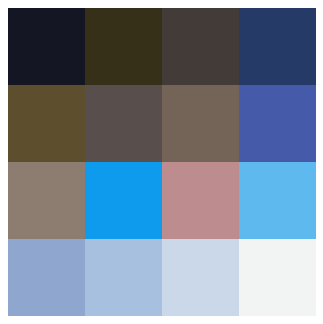

In [14]:
#  для KMeans

from matplotlib.pyplot import figure
figure(figsize=(5, 5), dpi=80)
colors = np.unique(img_recolored.reshape(-1, img_recolored.shape[2]), axis=0)
colors = sorted(colors,key=sum)
colors = np.array(colors).reshape(4,4,3)
plt.axis('off')
plt.imshow(colors)

**Обучим модель MiniBatchKMeans**

Переведем 16 миллионов возможностей во всего-навсего 16 возможностей, используя K-means. Правда, чтобы ускорить работу алгоритма, мы будем использовать K-means на батчах — поднаборах данных. Заодно увидим, портит ли это результат.

Обучим модель MiniBatchKMeans на нормированном и «распрямленном» изображении с параметрами, указанными в вашем задании.

В изображении замените значения цветов каждого пикселя на значения координат центроида кластера к которому был отнесен этот пиксель. Постройте графики зависимостей цветов при помощи plot_pixels() с новой палитрой (параметр colors)

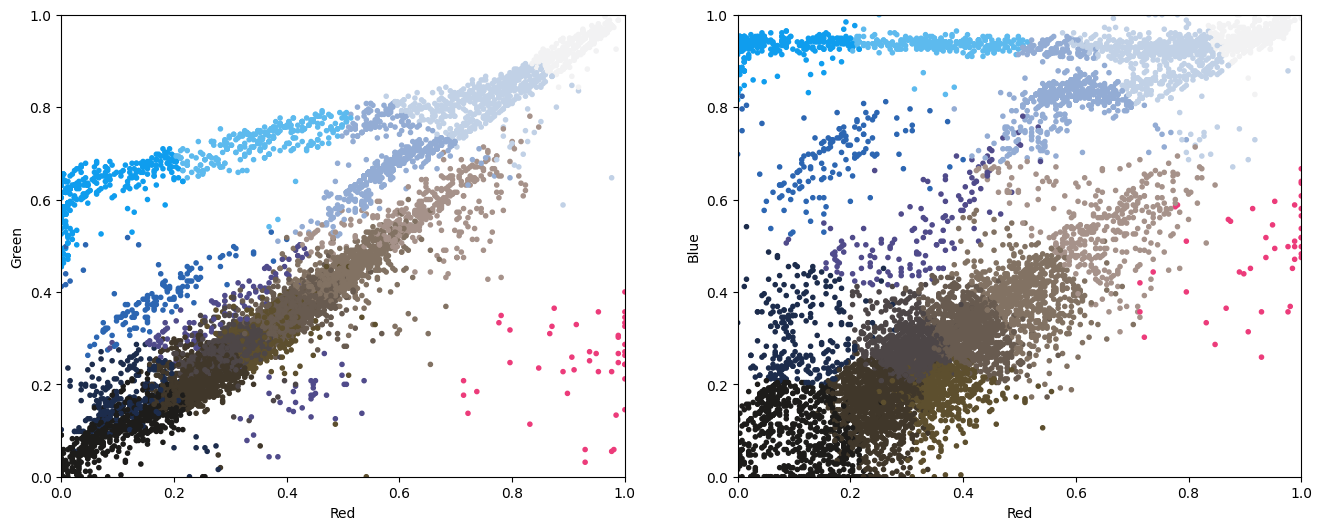

In [15]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=16, random_state=random_state)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors)

**Вычислите среднее значение интенсивности пикселей полученного изображения.**

In [16]:
print(np.mean(new_colors))

0.5221010358483625


**На генерации нагенерить пару картинок**

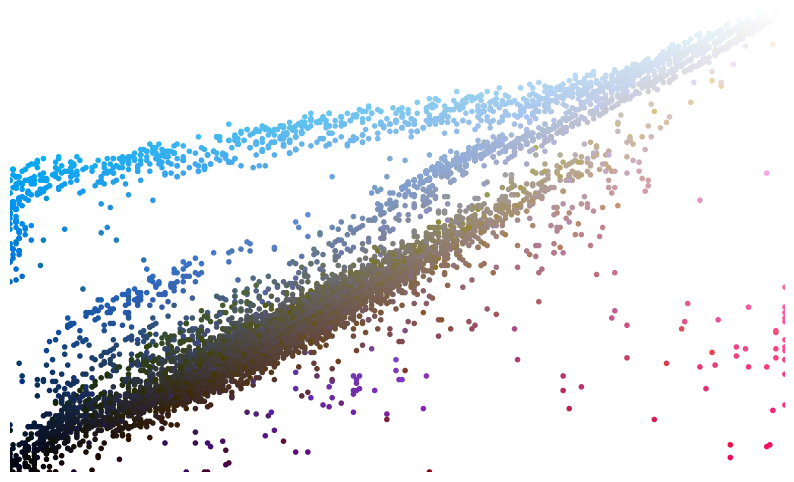

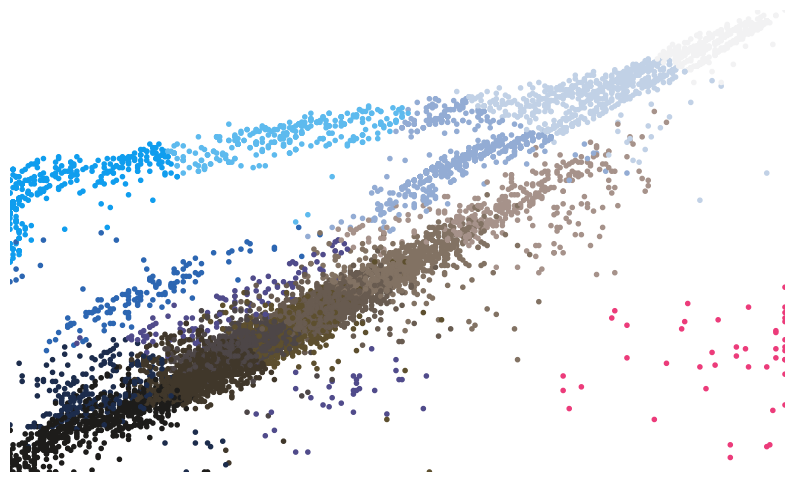

In [17]:
def plot_pixels_for_task(data, colors=None, N=10000, f_name=None):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.scatter(R, G, color=colors, marker='.')
    ax.set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    plt.axis('off')
    plt.savefig(f_name, dpi=300)

plot_pixels_for_task(data, f_name='Clust_RG_palette_1.png')
plot_pixels_for_task(data, colors=new_colors, f_name='Clust_RG_palette_2.png')

**Пора смотреть на результат!**

Построим рядом оригинальное изображение и изображение, в котором используется **лишь  16  цветов**.

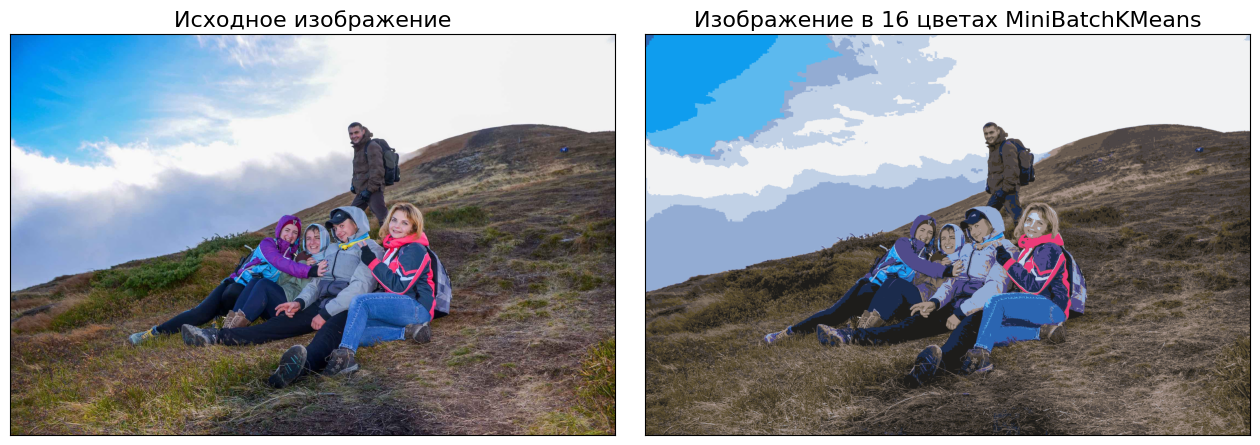

In [18]:
img_recolored_MiniBatch = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Исходное изображение', size=16)
ax[1].imshow(img_recolored_MiniBatch)
ax[1].set_title('Изображение в 16 цветах MiniBatchKMeans', size=16);

**Для MiniBatchKMeans**

Постройте изображение размера  4×4  на основе полученных  16  цветов.

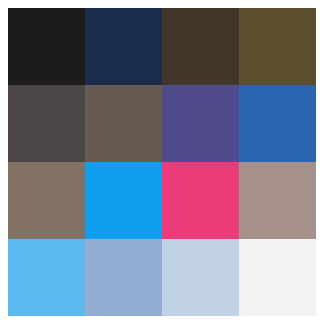

In [19]:
#  Для MiniBatchKMeans

from matplotlib.pyplot import figure
figure(figsize=(5, 5), dpi=80)
colors = np.unique(img_recolored_MiniBatch.reshape(-1, img_recolored.shape[2]), axis=0)
colors = sorted(colors,key=sum)
colors = np.array(colors).reshape(4,4,3)
plt.axis('off')
plt.imshow(colors)


Построим вместе для нагдядности графики распределения цветов картинки для нашей функции и для случайногораспределения цветов на картинке.

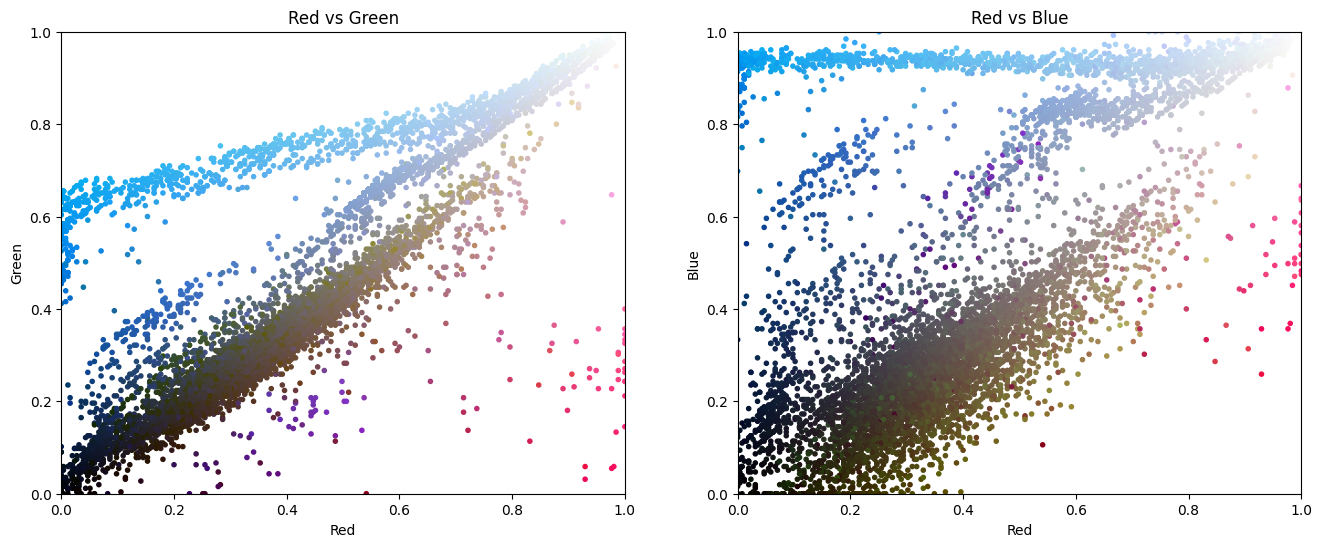

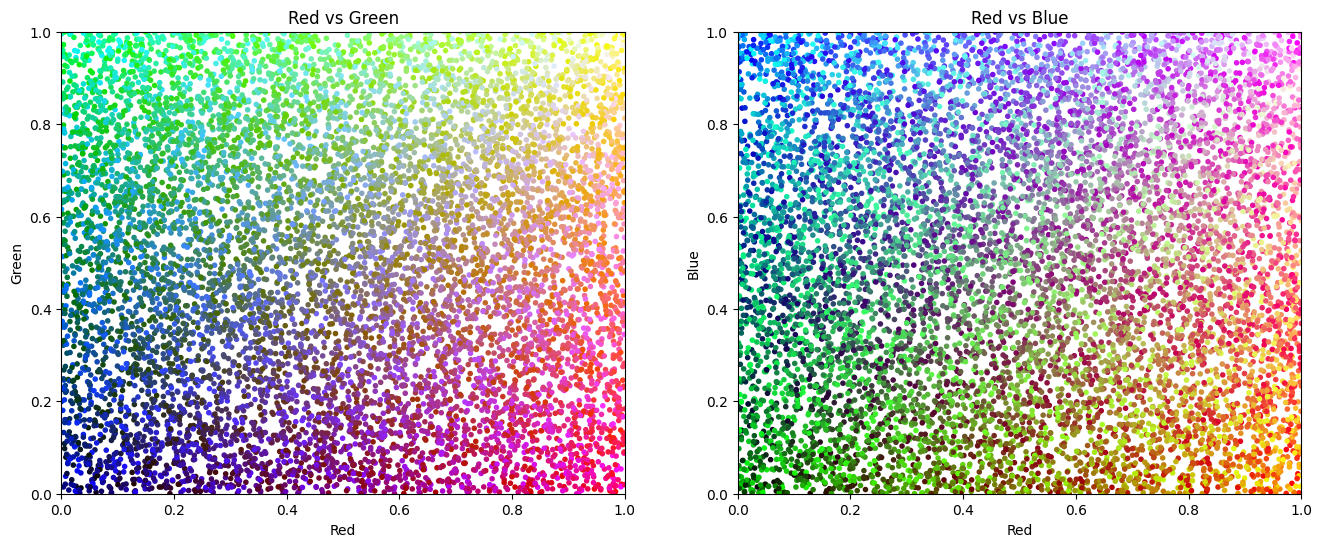

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1), title='Red vs Green')

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1), title='Red vs Blue')

    plt.show()

# Пример с изображением
import cv2
img = cv2.imread('/content/28.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
data_img = img.reshape(-1, 3) / 255.0  # Нормализация
plot_pixels(data_img)

# Пример с np.random.rand
data_random = np.random.rand(10000, 3)
plot_pixels(data_random)

Минимальное значение: 10.897559402576093
Максимальное значение: 243.52171664224562


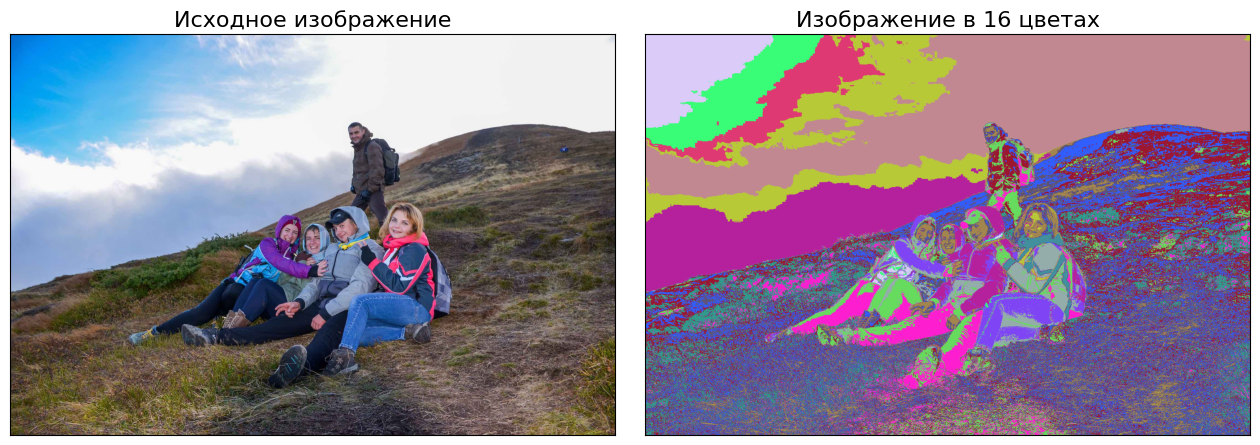

In [21]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Загрузка изображения
img = plt.imread('/content/28.jpg')  # Или используйте cv2.imread

# Преобразуем изображение в массив пикселей
h, w, c = img.shape
pixels = img.reshape(-1, 3)

# Применяем KMeans для уменьшения количества цветов до 16
kmeans = KMeans(n_clusters=16)
kmeans.fit(pixels)
colors = kmeans.cluster_centers_  # Центры кластеров (16 цветов)
labels = kmeans.labels_  # Метки кластеров для каждого пикселя

# Перекрашиваем изображение
img_recolored = colors[labels].reshape(img.shape)

# Проверка данных
print("Минимальное значение:", img_recolored.min())
print("Максимальное значение:", img_recolored.max())

# Приведение к правильному формату
if img_recolored.dtype != np.uint8:
    img_recolored = (img_recolored * 255).astype(np.uint8)  # Если данные в float [0, 1]

# Визуализация
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Исходное изображение', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('Изображение в 16 цветах', size=16)

plt.show()

In [22]:
print("Минимальное значение:", img_recolored.min())
print("Максимальное значение:", img_recolored.max())

Минимальное значение: 22
Максимальное значение: 254


In [23]:
print("Центроиды (16 цветов):", kmeans.cluster_centers_)

Центроиды (16 цветов): [[102.59275235  89.71827793  77.29782565]
 [194.48201857 208.60277763 229.11475313]
 [ 78.52961037 180.69214119 238.39663815]
 [ 62.43504983  53.81223458  30.67447277]
 [148.28769542 169.79451611 208.42881702]
 [241.69899455 242.48234699 243.52171664]
 [128.88118884 113.76899145 100.83967744]
 [ 49.77836244  67.94434637 115.11416965]
 [ 21.07406304  22.20954503  25.91308971]
 [165.28449242 145.09140779 135.83750022]
 [ 37.54866407  41.01627062  59.60312112]
 [ 72.78364929  95.64439179 172.63464455]
 [234.17449116  64.81228644 124.10072798]
 [ 78.92154722  69.35863403  60.4240693 ]
 [136.40595069 195.98885839 237.38183755]
 [ 10.8975594  153.39235188 236.90163358]]


In [24]:
unique_colors = np.unique(img_recolored.reshape(-1, 3), axis=0)
print("Количество уникальных цветов:", unique_colors.shape[0])  # Должно быть 16

Количество уникальных цветов: 16


Кластеры и цвета

**Кластеры:**

Кластеры — это группы пикселей, которые имеют похожие цвета.

В вашем случае вы используете KMeans с n_clusters=16, то есть все пиксели изображения разбиваются на 16 групп (кластеров).

**Центроиды (цвета кластеров):**

Каждый кластер имеет центр (центроид), который представляет собой средний цвет всех пикселей в этом кластере.

Эти 16 центроидов — это и есть 16 цветов, которые будут использоваться для перекрашивания изображения.

Что такое img_recolored.min() и img_recolored.max()?
img_recolored — это перекрашенное изображение, где каждый пиксель заменён на цвет его кластера (центроид).

img_recolored.min() и img_recolored.max() показывают минимальное и максимальное значения среди всех каналов (Red, Green, Blue) для всех пикселей в img_recolored.

Пример:

Предположим, у вас есть 16 центроидов (цветов):

Copy
Центроид 1: [0.1, 0.2, 0.3]
Центроид 2: [0.4, 0.5, 0.6]
...
Центроид 16: [0.9, 0.8, 0.7]
Тогда:

img_recolored.min() будет равно 0.1 (минимальное значение среди всех центроидов).

img_recolored.max() будет равно 0.9 (максимальное значение среди всех центроидов).

Как цвета распределены в кластерах?
В каждом кластере находятся пиксели, цвета которых близки к центроиду этого кластера.

Однако после перекрашивания все пиксели в кластере заменяются на один цвет — центроид. Поэтому:

В перекрашенном изображении (img_recolored) все пиксели, принадлежащие одному кластеру, имеют одинаковый цвет.

Разброс цветов внутри кластера теряется, так как все пиксели заменяются на центроид.

Иными словами:
У вас 16 кластеров = 16 цветов (центроидов).

В перекрашенном изображении (img_recolored) каждый пиксель имеет один из этих 16 цветов.

img_recolored.min() и img_recolored.max() показывают диапазон значений этих 16 цветов (центроидов), а не разброс цветов внутри кластеров.

Пример
До KMeans:

У вас может быть миллионы уникальных цветов.

Цвета пикселей могут быть любыми в диапазоне [0, 1] (для float) или [0, 255] (для uint8).

После KMeans:

Все пиксели заменяются на 16 цветов (центроидов).

Диапазон значений этих 16 цветов будет от img_recolored.min() до img_recolored.max()

**Итог**

У вас 16 кластеров = 16 цветов (центроидов).

В перекрашенном изображении все пиксели имеют один из этих 16 цветов.

img_recolored.min() и img_recolored.max() показывают диапазон значений этих 16 цветов, а не разброс внутри кластеров.